# ***Importing Libraries***

In [260]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
from scipy.stats import norm, ttest_1samp, ttest_ind, chisquare, chi2_contingency, f_oneway
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import minmax_scaling

#importing relevant libraries

# ***Downloading and Exploring data***

In [261]:
!gdown 1pljm6_3nxcFS9UMIFm124HBsjNZP6ACA

Downloading...
From: https://drive.google.com/uc?id=1pljm6_3nxcFS9UMIFm124HBsjNZP6ACA
To: /content/Credit_score.csv
100% 27.4M/27.4M [00:00<00:00, 145MB/s]


In [262]:
df = pd.read_csv("Credit_score.csv")
df.head()

#saving data into a DataFrame

<ipython-input-262-f7b044e4e7f4>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Credit_score.csv")


ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      19114.12            1824.843333                  3  ...   
1      19114.12                    NaN                  3  ...   
2      19114.12                    NaN                  3  ...   
3      19114.12                    NaN                  3  ...   
4      19114.12            1824.843333                  3  ...   

   Num_Credit_Inquiries  Credit_Mix Outstanding_Debt Credit_Utilization_Ratio  \
0                   4.0           _           809.98                26.822620   
1                   4.0        Good           809.98                31.944960   
2                   4.0        Good           809.98                28.609352   
3                   4.0        Good           809.98                31.377862   
4                   4.0        Good           809.98                24.797347   

      Credit_History_Age Payment_of_Min_Amount Total_EMI_per_month  \
0  22 Years and 1 Months                    No           49.574949   
1                    NaN                    No           49.574949   
2  22 Years and 3 Months                    No           49.574949   
3  22 Years and 4 Months                    No           49.574949   
4  22 Years and 5 Months                    No           49.574949   

   Amount_invested_monthly                 Payment_Behaviour Monthly_Balance  
0              80.41529544   High_spent_Small_value_payments     312.4940887  
1              118.2802216    Low_spent_Large_value_payments     284.6291625  
2              81.69952126   Low_spent_Medium_value_payments     331.2098629  
3              199.4580744    Low_spent_Small_value_payments     223.4513097  
4              41.42015309  High_spent_Medium_value_payments      341.489231  

[5 rows x 27 columns]

In [263]:
df.info()

# extracting info about the dataset
# 7693 samples, 27 features
# Following columns have null values : Name, Monthly_Inhand_Salary, Type_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance
# Dtype will need to be changed for following features - Annual_Income (Float), Num_of_Loan (Int), Num_of_Delayed_Payment (Int), Outstanding_Debt (Float) , Credit_Utilization_Ratio (Float), Total_EMI_per_month (Float), Amount_invested_monthly (Float), Monthly_Balance (Float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [264]:
df.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633330        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

In [265]:
df.shape

(100000, 27)

In [266]:
df.describe(include = object)

ID Customer_ID    Month    Name     Age        SSN Occupation  \
count   100000      100000   100000   90015  100000     100000     100000   
unique  100000       12500        8   10139    1788      12501         16   
top     0x1602   CUS_0xd40  January  Langep      38  #F%$D@*&8    _______   
freq         1           8    12500      44    2833       5572       7062   

       Annual_Income Num_of_Loan   Type_of_Loan Num_of_Delayed_Payment  \
count         100000      100000          88592                  92998   
unique         18940         434           6260                    749   
top         36585.12           3  Not Specified                     19   
freq              16       14386           1408                   5327   

       Changed_Credit_Limit Credit_Mix Outstanding_Debt  \
count                100000     100000           100000   
unique                 3635          4            13178   
top                       _   Standard          1360.45   
freq                   2091      36479               24   

            Credit_History_Age Payment_of_Min_Amount Amount_invested_monthly  \
count                    90970                100000                   95521   
unique                     404                     3                   91049   
top     15 Years and 11 Months                   Yes               __10000__   
freq                       446                 52326                    4305   

                     Payment_Behaviour                   Monthly_Balance  
count                           100000                             98800  
unique                               7                             98790  
top     Low_spent_Small_value_payments  __-333333333333333333333333333__  
freq                             25513                                 9

In [267]:
# Number of customers
df['Customer_ID'].nunique()

12500

In [268]:
# Unique value counts for month
df['Month'].value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

In [269]:
# Unique value counts for Age
df['Age'].value_counts()

38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: Age, Length: 1788, dtype: int64

In [270]:
# Min max value for age for Age
df['Age'].min(), df['Age'].max()

('-500', '995')

In [271]:
# Unique value counts for SSN
df['SSN'].value_counts()

# #F%$D@*&8 in SSN needs to be updated as it is the most frequent

#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: SSN, Length: 12501, dtype: int64

In [272]:
#Keeping only the columns that are relevant for calculation of credit score

df1 = df.copy()

df1.drop(["Age","SSN","Occupation","Num_Bank_Accounts","Num_Credit_Card","Interest_Rate","Num_of_Loan","Type_of_Loan","Amount_invested_monthly","Monthly_Balance"], axis = 1, inplace = True)

df1.head()

ID Customer_ID     Month           Name Annual_Income  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh      19114.12   
1  0x1603   CUS_0xd40  February  Aaron Maashoh      19114.12   
2  0x1604   CUS_0xd40     March  Aaron Maashoh      19114.12   
3  0x1605   CUS_0xd40     April  Aaron Maashoh      19114.12   
4  0x1606   CUS_0xd40       May  Aaron Maashoh      19114.12   

   Monthly_Inhand_Salary  Delay_from_due_date Num_of_Delayed_Payment  \
0            1824.843333                    3                      7   
1                    NaN                   -1                    NaN   
2                    NaN                    3                      7   
3                    NaN                    5                      4   
4            1824.843333                    6                    NaN   

  Changed_Credit_Limit  Num_Credit_Inquiries Credit_Mix Outstanding_Debt  \
0                11.27                   4.0          _           809.98   
1                11.27                   4.0       Good           809.98   
2                    _                   4.0       Good           809.98   
3                 6.27                   4.0       Good           809.98   
4                11.27                   4.0       Good           809.98   

   Credit_Utilization_Ratio     Credit_History_Age Payment_of_Min_Amount  \
0                 26.822620  22 Years and 1 Months                    No   
1                 31.944960                    NaN                    No   
2                 28.609352  22 Years and 3 Months                    No   
3                 31.377862  22 Years and 4 Months                    No   
4                 24.797347  22 Years and 5 Months                    No   

   Total_EMI_per_month                 Payment_Behaviour  
0            49.574949   High_spent_Small_value_payments  
1            49.574949    Low_spent_Large_value_payments  
2            49.574949   Low_spent_Medium_value_payments  
3            49.574949    Low_spent_Small_value_payments  
4            49.574949  High_spent_Medium_value_payments

In [273]:
#Extracting info for df1
df1.info()

# Columns with missing data (need to be treated) : Name, Monthly_Inhand_Salary, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age
# Columns with incorrect data type : Annual_Income (float), Num_of_Delayed_Payment (int), Changed_Credit_Limit (float), Outstanding_Debt (float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Annual_Income             100000 non-null  object 
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Delay_from_due_date       100000 non-null  int64  
 7   Num_of_Delayed_Payment    92998 non-null   object 
 8   Changed_Credit_Limit      100000 non-null  object 
 9   Num_Credit_Inquiries      98035 non-null   float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  object 
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        90970 non-null   ob

In [274]:
# Shape of df1 dataset
df1.shape

(100000, 17)

In [275]:
# Number of unique customers
df['Customer_ID'].nunique()

12500

In [276]:
# Number of unique names
df['Name'].nunique()

10139

In [277]:
# Number of customers
df['Customer_ID'].value_counts()

CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64

In [278]:
# Number of Month
df['Month'].value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

In [279]:
#Checking % of null values in each column
df1.isna().sum()/len(df1)*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Payment_Behaviour            0.000
dtype: float64

In [280]:
# Number of Annual_Income
df['Annual_Income'].value_counts()

36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933       1
Name: Annual_Income, Length: 18940, dtype: int64

In [281]:
# Number of Monthly_Inhand_Salary
df['Monthly_Inhand_Salary'].value_counts()

6769.130000    15
6358.956667    15
2295.058333    15
6082.187500    15
3080.555000    14
               ..
1087.546445     1
3189.212103     1
5640.117744     1
7727.560450     1
2443.654131     1
Name: Monthly_Inhand_Salary, Length: 13235, dtype: int64

In [282]:
# Number of Delay_from_due_date
df['Delay_from_due_date'].value_counts()

 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: Delay_from_due_date, Length: 73, dtype: int64

In [283]:
# Min Max of Delay_from_due_date
df['Delay_from_due_date'].min(), df['Delay_from_due_date'].max()

(-5, 67)

In [284]:
# Number of Num_of_Delayed_Payment
df['Num_of_Delayed_Payment'].value_counts()

19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: Num_of_Delayed_Payment, Length: 749, dtype: int64

In [285]:
# List of unique Num_of_Delayed_Payment
df['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [286]:
# Number of Changed_Credit_Limit
df['Changed_Credit_Limit'].value_counts()

_        2091
8.22      135
11.5      127
11.32     126
7.35      121
         ... 
-5.78       1
30.1        1
35.89       1
-3.67       1
21.17       1
Name: Changed_Credit_Limit, Length: 3635, dtype: int64

In [287]:
# Min Max of Changed_Credit_Limit
df['Changed_Credit_Limit'].min(), df['Changed_Credit_Limit'].max()

('-0.01', '_')

In [288]:
# Number of Num_Credit_Inquiries
df['Num_Credit_Inquiries'].value_counts()

4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1721.0        1
1750.0        1
2397.0        1
621.0         1
74.0          1
Name: Num_Credit_Inquiries, Length: 1223, dtype: int64

In [289]:
# Min Max of Num_Credit_Inquiries
df['Num_Credit_Inquiries'].min(), df['Num_Credit_Inquiries'].max()

(0.0, 2597.0)

In [290]:
# Number of Credit_Mix
df['Credit_Mix'].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [291]:
# Number of Outstanding_Debt
df['Outstanding_Debt'].value_counts()

1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: Outstanding_Debt, Length: 13178, dtype: int64

In [292]:
# Min Max of Outstanding_Debt
df['Outstanding_Debt'].min(), df['Outstanding_Debt'].max()

('0.23', '999.48')

In [293]:
# Number of Credit_Utilization_Ratio
df['Credit_Utilization_Ratio'].value_counts()

26.407909    2
33.163023    2
26.822620    1
30.462162    1
33.933755    1
            ..
38.730069    1
30.017515    1
27.279794    1
27.002436    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 99998, dtype: int64

In [294]:
# Min Max of Credit_Utilization_Ratio
df['Credit_Utilization_Ratio'].min(), df['Credit_Utilization_Ratio'].max()

(20.0, 50.0)

In [295]:
# Number of Credit_History_Age
df['Credit_History_Age'].value_counts()

15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: Credit_History_Age, Length: 404, dtype: int64

In [296]:
# Number of Payment_of_Min_Amount
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [297]:
# Number of Total_EMI_per_month
df['Total_EMI_per_month'].value_counts()

0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: Total_EMI_per_month, Length: 14950, dtype: int64

In [298]:
# Number of Payment_Behaviour
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

**Observation**

* (100000, 17) - 100,000 samples
* 10139 Names are less than the number of customer IDs 12500, hence some names are missing.
* January to August data is provided for each of 12500 customers. **12500x8 = 100000 samples**
* Delay due date (-5, 67)
* Num credit enquiries (0.0, 2597.0)
* Credit Utilization ratio (20.0, 50.0)

**Action**
1. Columns with missing data (need to be treated) :
Name, Monthly_Inhand_Salary, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age
2. Columns with incorrect data type :
Annual_Income (float), Num_of_Delayed_Payment (int), Changed_Credit_Limit (float), Outstanding_Debt (float)

3. **Num_of_Delayed_Payment and Outstanding_debt** : has some post script characters like 848_ will need to be updated
4. **Credit_Mix** : Replace _ with mode
5. **Payment_Behaviour** : Replace !@9#%8 with mode


# ***Data Cleaning***

In [299]:
df1.describe(include = object)

ID Customer_ID    Month    Name Annual_Income  \
count   100000      100000   100000   90015        100000   
unique  100000       12500        8   10139         18940   
top     0x1602   CUS_0xd40  January  Langep      36585.12   
freq         1           8    12500      44            16   

       Num_of_Delayed_Payment Changed_Credit_Limit Credit_Mix  \
count                   92998               100000     100000   
unique                    749                 3635          4   
top                        19                    _   Standard   
freq                     5327                 2091      36479   

       Outstanding_Debt      Credit_History_Age Payment_of_Min_Amount  \
count            100000                   90970                100000   
unique            13178                     404                     3   
top             1360.45  15 Years and 11 Months                   Yes   
freq                 24                     446                 52326   

                     Payment_Behaviour  
count                           100000  
unique                               7  
top     Low_spent_Small_value_payments  
freq                             25513

***Replacing Dummy values with mode***

In [300]:
# Replace the dummy value in Pyment Behaviour with mode
df1['Payment_Behaviour'].replace({"!@9#%8" : "Low_spent_Small_value_payments"}, inplace = True)

In [301]:
# Number of Payment_Behaviour
df1['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      33113
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: Payment_Behaviour, dtype: int64

In [302]:
# Replace the _ value in Credit Mix with mode
df1['Credit_Mix'].replace({"_" : "Standard"}, inplace = True)

In [303]:
# Number of Credit_Mix
df1['Credit_Mix'].value_counts()

Standard    56674
Good        24337
Bad         18989
Name: Credit_Mix, dtype: int64

In [304]:
# Removing the _ value in Outstanding_debt
df1['Outstanding_Debt'] = df1['Outstanding_Debt'].str.replace("_", "")

In [305]:
df1['Outstanding_Debt'].value_counts()

1360.45    24
460.46     24
1151.7     24
1109.03    24
1448.3     16
           ..
771.0       1
2236.0      1
2517.0      1
1223.0      1
1675.0      1
Name: Outstanding_Debt, Length: 12209, dtype: int64

In [306]:
# Removing the _ value in Num_of_Delayed_Payment
df1['Num_of_Delayed_Payment'] = df1['Num_of_Delayed_Payment'].str.replace("_", "")

In [307]:
df1['Num_of_Delayed_Payment'].value_counts()

19      5481
17      5412
16      5312
10      5309
15      5237
        ... 
1534       1
3739       1
3313       1
4191       1
2047       1
Name: Num_of_Delayed_Payment, Length: 711, dtype: int64

In [308]:
# Removing the _ value in Annual_Income
df1['Annual_Income'] = df1['Annual_Income'].str.replace("_", "")

In [309]:
# Removing the _ value in Annual_Income
df1['Changed_Credit_Limit'] = df1['Changed_Credit_Limit'].str.replace("_", "")

***Missing Values Treatment***

* Name
* Monthly_Inhand_Salary
* Num_of_Delayed_Payment
* Num_Credit_Inquiries
* Credit_History_Age

In [310]:
# Replacing Null Name values with "Unknown"
print("Before:",df1['Name'].isna().sum())

df1['Name'].fillna("Unknown", inplace = True)

print("After:",df1['Name'].isna().sum())

Before: 9985
After: 0


In [311]:
df1['Monthly_Inhand_Salary'].dtype

dtype('float64')

In [312]:
# Replacing Null Monthly_Inhand_Salary values with mean values
print("Before:",df1['Monthly_Inhand_Salary'].isna().sum())

grouped_data = df1.groupby(["Customer_ID"])['Monthly_Inhand_Salary'].transform(lambda x : x.mean()) #[0] if not x.mean().isnull() else np.NaN)
df1['Monthly_Inhand_Salary'].fillna(grouped_data, inplace = True)

print("Before:",df1['Monthly_Inhand_Salary'].isna().sum())

############ Transform works, apply not working - Understand why ?

Before: 15002
Before: 0


In [313]:
df1['Num_of_Delayed_Payment'].dtype

dtype('O')

In [314]:
# Converting data type to float
df1['Num_of_Delayed_Payment'] = df1['Num_of_Delayed_Payment'].astype(float)

# Replacing Null Num_of_Delayed_Payment values with mode values
print("Before:",df1['Num_of_Delayed_Payment'].isna().sum())

grouped_data = df1.groupby(["Customer_ID"])['Num_of_Delayed_Payment'].transform(lambda x : x.mean()) #[0] if not x.mean().empty else np.NaN)
df1['Num_of_Delayed_Payment'].fillna(grouped_data, inplace = True)

print("Before:",df1['Num_of_Delayed_Payment'].isna().sum())

Before: 7002
Before: 0


In [315]:
df1['Num_Credit_Inquiries'].dtype

dtype('float64')

In [316]:
# Replacing Null Num_Credit_Inquiries values with mode values
print("Before:",df1['Num_Credit_Inquiries'].isna().sum())

grouped_data = df1.groupby(["Customer_ID"])['Num_Credit_Inquiries'].transform(lambda x : x.mean())  #[0] if not x.mode().empty else np.NaN)
df1['Num_Credit_Inquiries'].fillna(grouped_data, inplace = True)

print("Before:",df1['Num_Credit_Inquiries'].isna().sum())

Before: 1965
Before: 0


In [317]:
df1['Credit_History_Age'].dtype

dtype('O')

In [318]:
# Replacing Null Num_of_Delayed_Payment values with mode values
print("Before:",df1['Credit_History_Age'].isna().sum())

grouped_data = df1.groupby(["Customer_ID"])['Credit_History_Age'].transform(lambda x : x.mode()[0] if not x.mode().empty else np.NaN)
df1['Credit_History_Age'].fillna(grouped_data, inplace = True)

print("Before:",df1['Credit_History_Age'].isna().sum())

Before: 9030
Before: 0


***Correcting data type of columns***

* Annual_Income (float)
* Num_of_Delayed_Payment (float) - DONE
* Changed_Credit_Limit (float)
* Outstanding_Debt (float)

In [319]:
# Converting data type to float
print("Before: ",df1['Annual_Income'].dtype)

df1['Annual_Income'] = df1['Annual_Income'].astype(float)

print("After: ",df1['Annual_Income'].dtype)

Before:  object
After:  float64


In [320]:
# Converting data type to float
print("Before: ",df1['Outstanding_Debt'].dtype)

df1['Outstanding_Debt'] = df1['Outstanding_Debt'].astype(float)

print("After: ",df1['Outstanding_Debt'].dtype)

Before:  object
After:  float64


In [321]:
#Converting credit history in months

def convert_months(value):
  if pd.notnull(value):
    lst = value.split(' ')
    years = int(lst[0])
    months = int(lst[3])
    return (years*12) + months
  else:
    return value

df1['Credit_History_Age_Months'] = df1['Credit_History_Age'].apply(lambda x : convert_months(x))

In [322]:
df1.head()

ID Customer_ID     Month           Name  Annual_Income  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh       19114.12   
1  0x1603   CUS_0xd40  February  Aaron Maashoh       19114.12   
2  0x1604   CUS_0xd40     March  Aaron Maashoh       19114.12   
3  0x1605   CUS_0xd40     April  Aaron Maashoh       19114.12   
4  0x1606   CUS_0xd40       May  Aaron Maashoh       19114.12   

   Monthly_Inhand_Salary  Delay_from_due_date  Num_of_Delayed_Payment  \
0            1824.843333                    3                     7.0   
1            1824.843333                   -1                     6.0   
2            1824.843333                    3                     7.0   
3            1824.843333                    5                     4.0   
4            1824.843333                    6                     6.0   

  Changed_Credit_Limit  Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
0                11.27                   4.0   Standard            809.98   
1                11.27                   4.0       Good            809.98   
2                                        4.0       Good            809.98   
3                 6.27                   4.0       Good            809.98   
4                11.27                   4.0       Good            809.98   

   Credit_Utilization_Ratio     Credit_History_Age Payment_of_Min_Amount  \
0                 26.822620  22 Years and 1 Months                    No   
1                 31.944960  22 Years and 1 Months                    No   
2                 28.609352  22 Years and 3 Months                    No   
3                 31.377862  22 Years and 4 Months                    No   
4                 24.797347  22 Years and 5 Months                    No   

   Total_EMI_per_month                 Payment_Behaviour  \
0            49.574949   High_spent_Small_value_payments   
1            49.574949    Low_spent_Large_value_payments   
2            49.574949   Low_spent_Medium_value_payments   
3            49.574949    Low_spent_Small_value_payments   
4            49.574949  High_spent_Medium_value_payments   

   Credit_History_Age_Months  
0                        265  
1                        265  
2                        267  
3                        268  
4                        269

In [323]:
# Extracting info for cleansed data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         100000 non-null  object 
 1   Customer_ID                100000 non-null  object 
 2   Month                      100000 non-null  object 
 3   Name                       100000 non-null  object 
 4   Annual_Income              100000 non-null  float64
 5   Monthly_Inhand_Salary      100000 non-null  float64
 6   Delay_from_due_date        100000 non-null  int64  
 7   Num_of_Delayed_Payment     100000 non-null  float64
 8   Changed_Credit_Limit       100000 non-null  object 
 9   Num_Credit_Inquiries       100000 non-null  float64
 10  Credit_Mix                 100000 non-null  object 
 11  Outstanding_Debt           100000 non-null  float64
 12  Credit_Utilization_Ratio   100000 non-null  float64
 13  Credit_History_Age         100

# ***Exploratory Data Analysis***
Univariate and Bivariate analysis

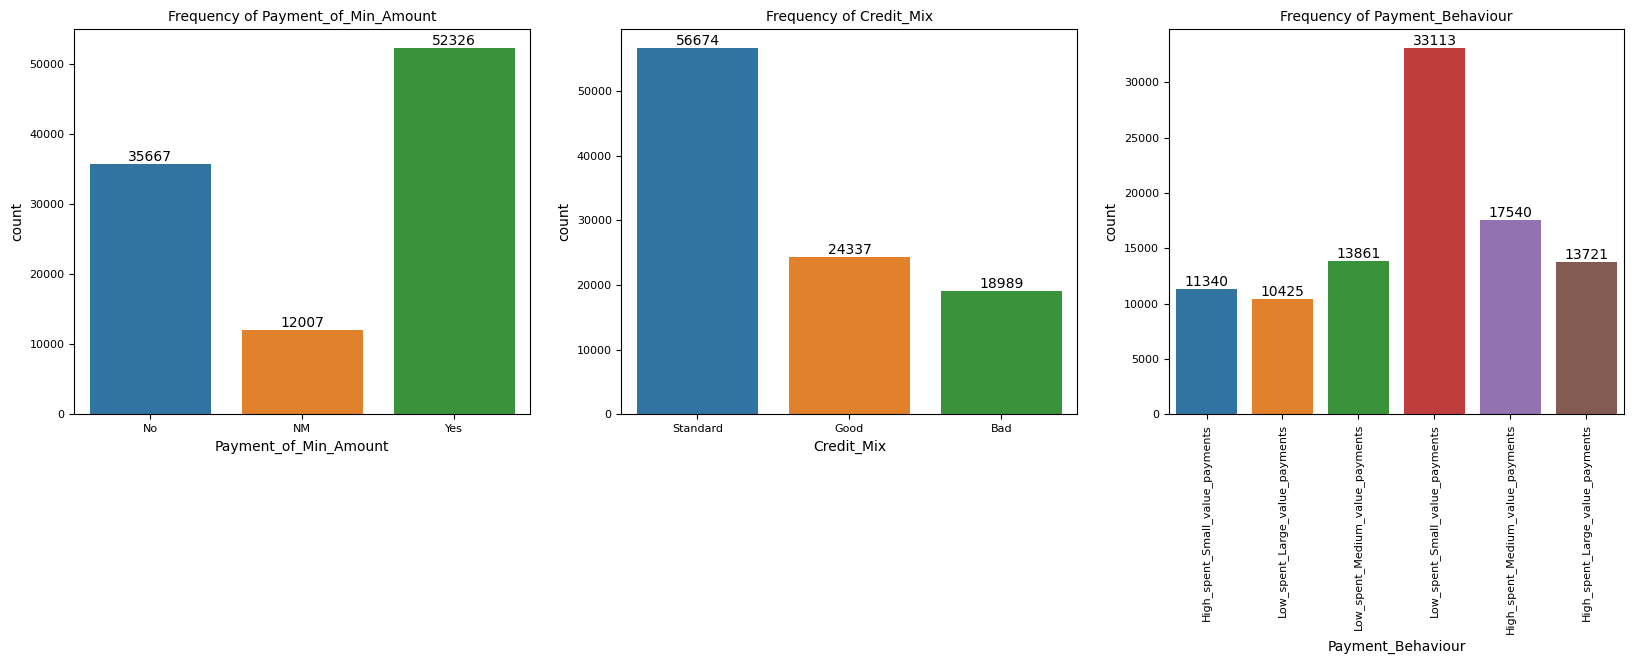

In [324]:
#Plotting Categorical variables using countplot

plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Frequency of Payment_of_Min_Amount",fontsize = 10)
ax = sns.countplot(data = df1, x = 'Payment_of_Min_Amount')
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(1,3,2)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Frequency of Credit_Mix",fontsize = 10)
ax = sns.countplot(data = df1, x = 'Credit_Mix')
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(1,3,3)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8, rotation=90)
plt.title("Frequency of Payment_Behaviour",fontsize = 10)
ax = sns.countplot(data = df1, x = 'Payment_Behaviour')
for label in ax.containers:
    ax.bar_label(label)

plt.show()

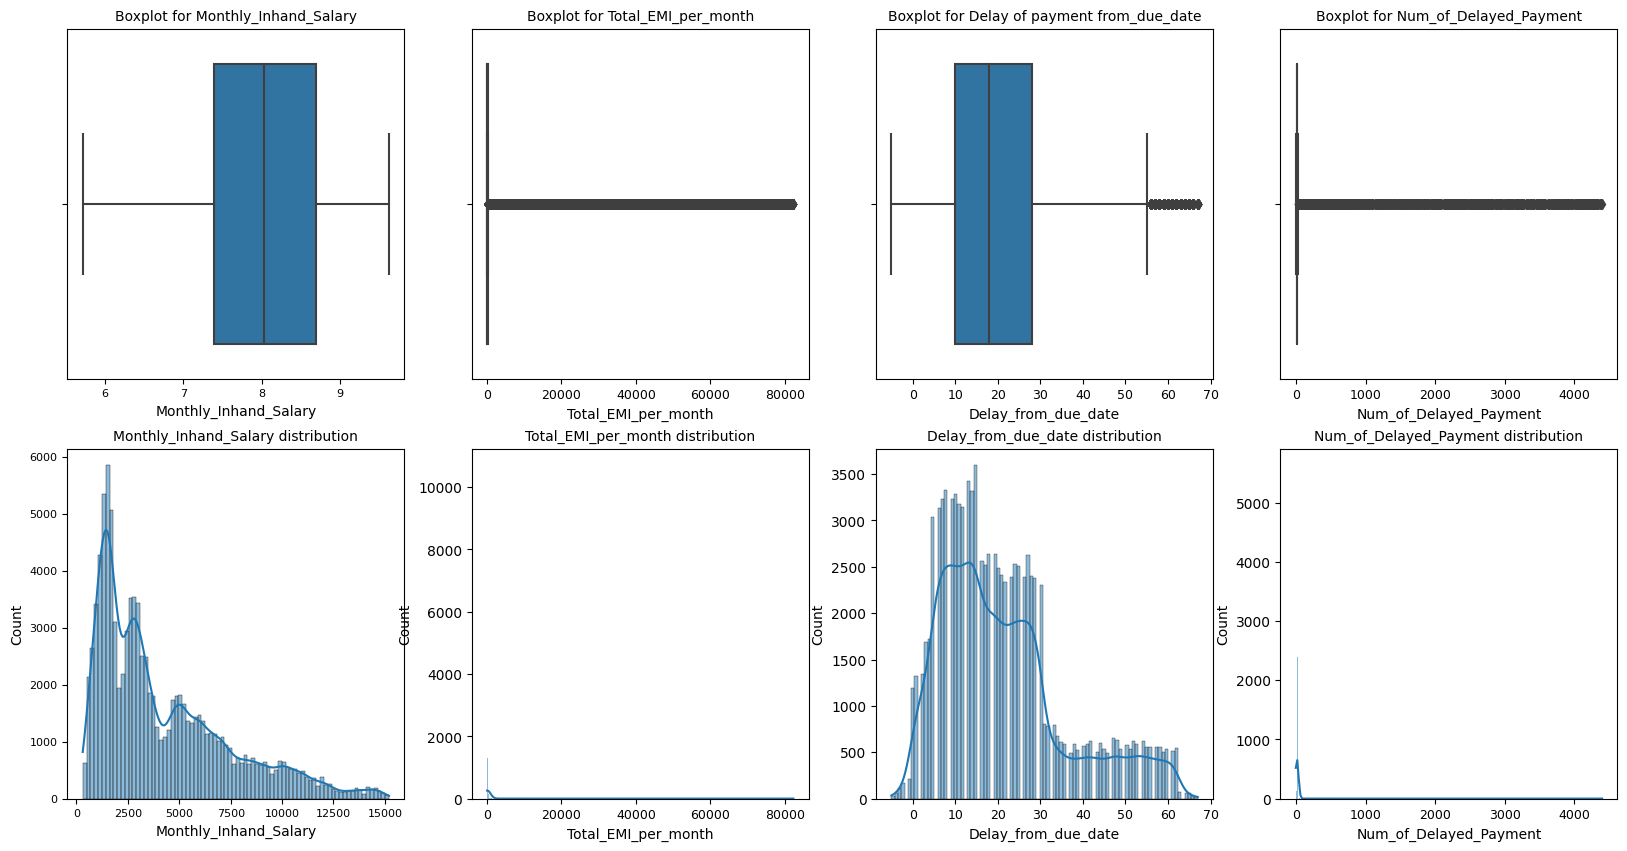

In [325]:
#Plotting Continuous Numerical variables

plt.figure(figsize = (20,10))

plt.subplot(2,4,1)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Boxplot for Monthly_Inhand_Salary",fontsize = 10)
ax = sns.boxplot(data = df1, x = np.log(df1['Monthly_Inhand_Salary']))
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,2)
plt.xticks(fontsize = 9)
plt.title("Boxplot for Total_EMI_per_month",fontsize = 10)
ax = sns.boxplot(data = df1, x = 'Total_EMI_per_month', )
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,3)
plt.xticks(fontsize = 9)
plt.title("Boxplot for Delay of payment from_due_date",fontsize = 10)
ax = sns.boxplot(data = df1, x = 'Delay_from_due_date')
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,4)
plt.xticks(fontsize = 9)
plt.title("Boxplot for Num_of_Delayed_Payment",fontsize = 10)
ax = sns.boxplot(data = df1, x = 'Num_of_Delayed_Payment')
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,5)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Monthly_Inhand_Salary distribution",fontsize = 10)
sns.histplot(data = df1, x = 'Monthly_Inhand_Salary', kde = True)

plt.subplot(2,4,6)
plt.xticks(fontsize = 9)
plt.title("Total_EMI_per_month distribution",fontsize = 10)
sns.histplot(data = df1, x = 'Total_EMI_per_month', kde = True)

plt.subplot(2,4,7)
plt.xticks(fontsize = 9)
plt.title("Delay_from_due_date distribution",fontsize = 10)
sns.histplot(data = df1, x = 'Delay_from_due_date', kde = True)

plt.subplot(2,4,8)
plt.xticks(fontsize = 9)
plt.title("Num_of_Delayed_Payment distribution",fontsize = 10)
sns.histplot(data = df1, x = 'Num_of_Delayed_Payment', kde = True)

plt.show()

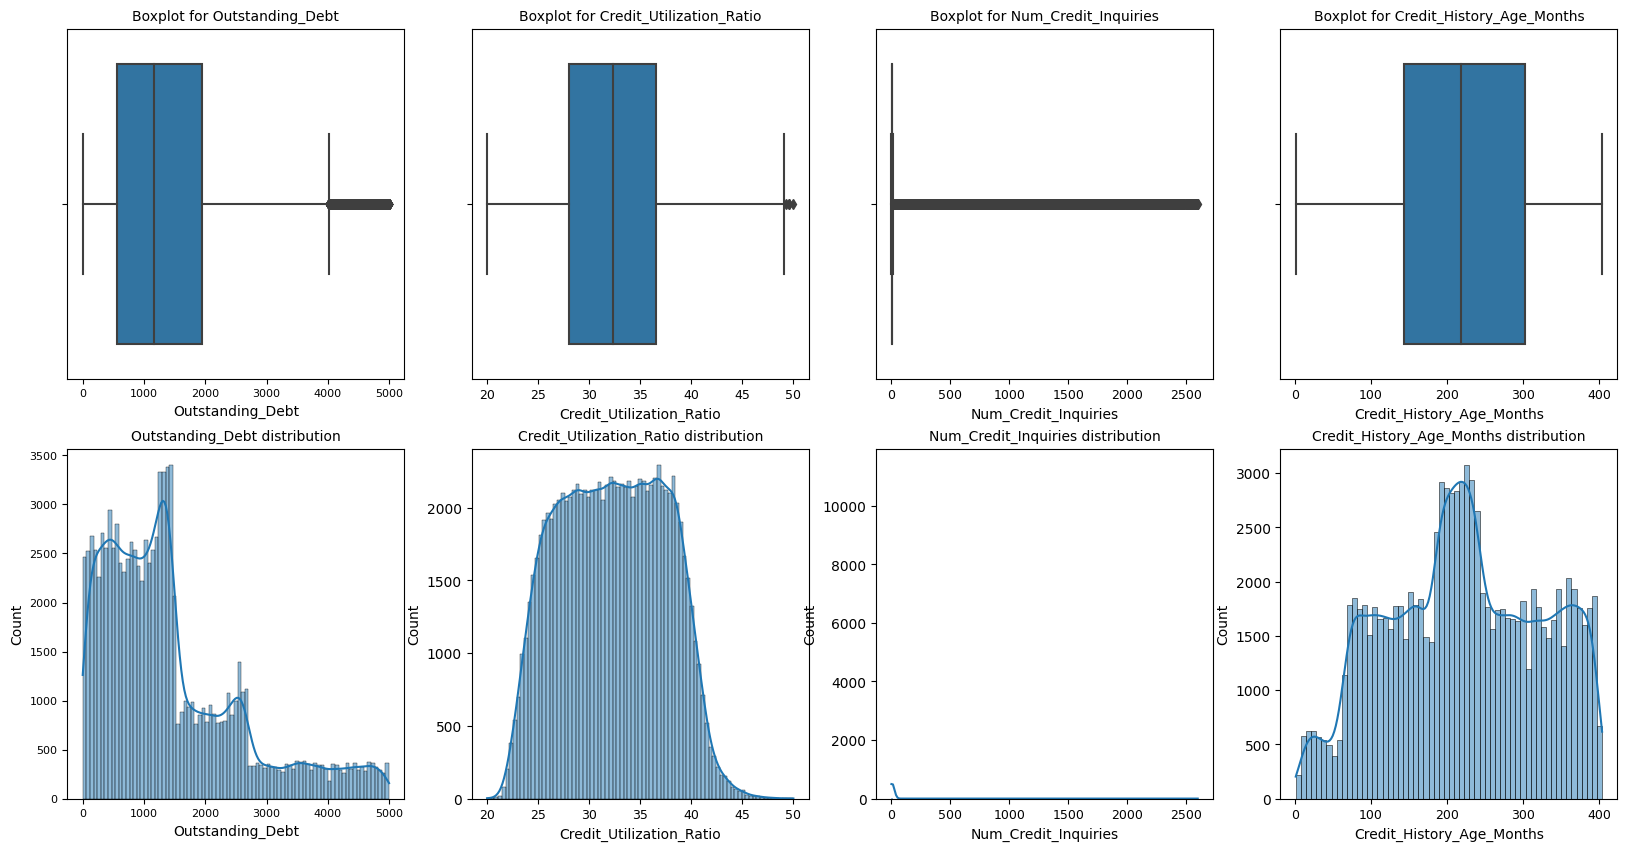

In [326]:
#Plotting Continuous Numerical variables

plt.figure(figsize = (20,10))

plt.subplot(2,4,1)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Boxplot for Outstanding_Debt",fontsize = 10)
ax = sns.boxplot(data = df1, x = 'Outstanding_Debt')
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,2)
plt.xticks(fontsize = 9)
plt.title("Boxplot for Credit_Utilization_Ratio",fontsize = 10)
ax = sns.boxplot(data = df1, x = 'Credit_Utilization_Ratio', )
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,3)
plt.xticks(fontsize = 9)
plt.title("Boxplot for Num_Credit_Inquiries",fontsize = 10)
ax = sns.boxplot(data = df1, x = 'Num_Credit_Inquiries')
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,4)
plt.xticks(fontsize = 9)
plt.title("Boxplot for Credit_History_Age_Months",fontsize = 10)
ax = sns.boxplot(data = df1, x = 'Credit_History_Age_Months')
for label in ax.containers:
    ax.bar_label(label)

plt.subplot(2,4,5)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Outstanding_Debt distribution",fontsize = 10)
sns.histplot(data = df1, x = 'Outstanding_Debt', kde = True)

plt.subplot(2,4,6)
plt.xticks(fontsize = 9)
plt.title("Credit_Utilization_Ratio distribution",fontsize = 10)
sns.histplot(data = df1, x = 'Credit_Utilization_Ratio', kde = True)

plt.subplot(2,4,7)
plt.xticks(fontsize = 9)
plt.title("Num_Credit_Inquiries distribution",fontsize = 10)
sns.histplot(data = df1, x = 'Num_Credit_Inquiries', kde = True)

plt.subplot(2,4,8)
plt.xticks(fontsize = 9)
plt.title("Credit_History_Age_Months distribution",fontsize = 10)
sns.histplot(data = df1, x = 'Credit_History_Age_Months', kde = True)

plt.show()

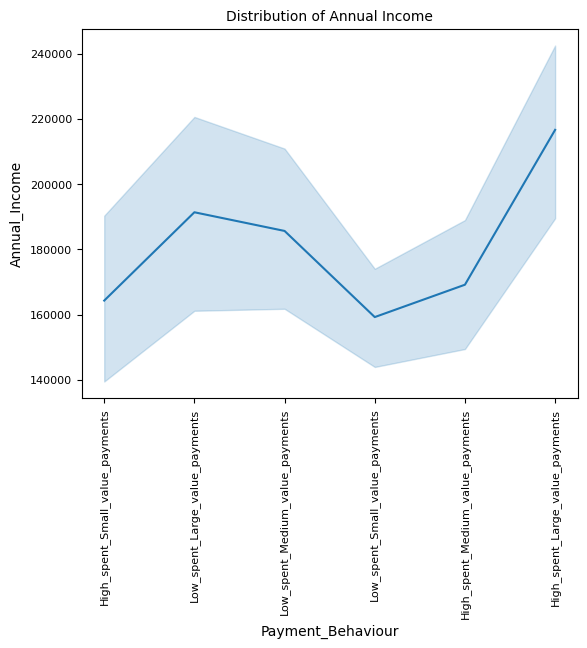

In [327]:
#Plot of Annual Income vs payment behaviour
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8, rotation=90)
plt.title("Distribution of Annual Income",fontsize = 10)
sns.lineplot(data = df1, y = 'Annual_Income', x = 'Payment_Behaviour')
plt.show()

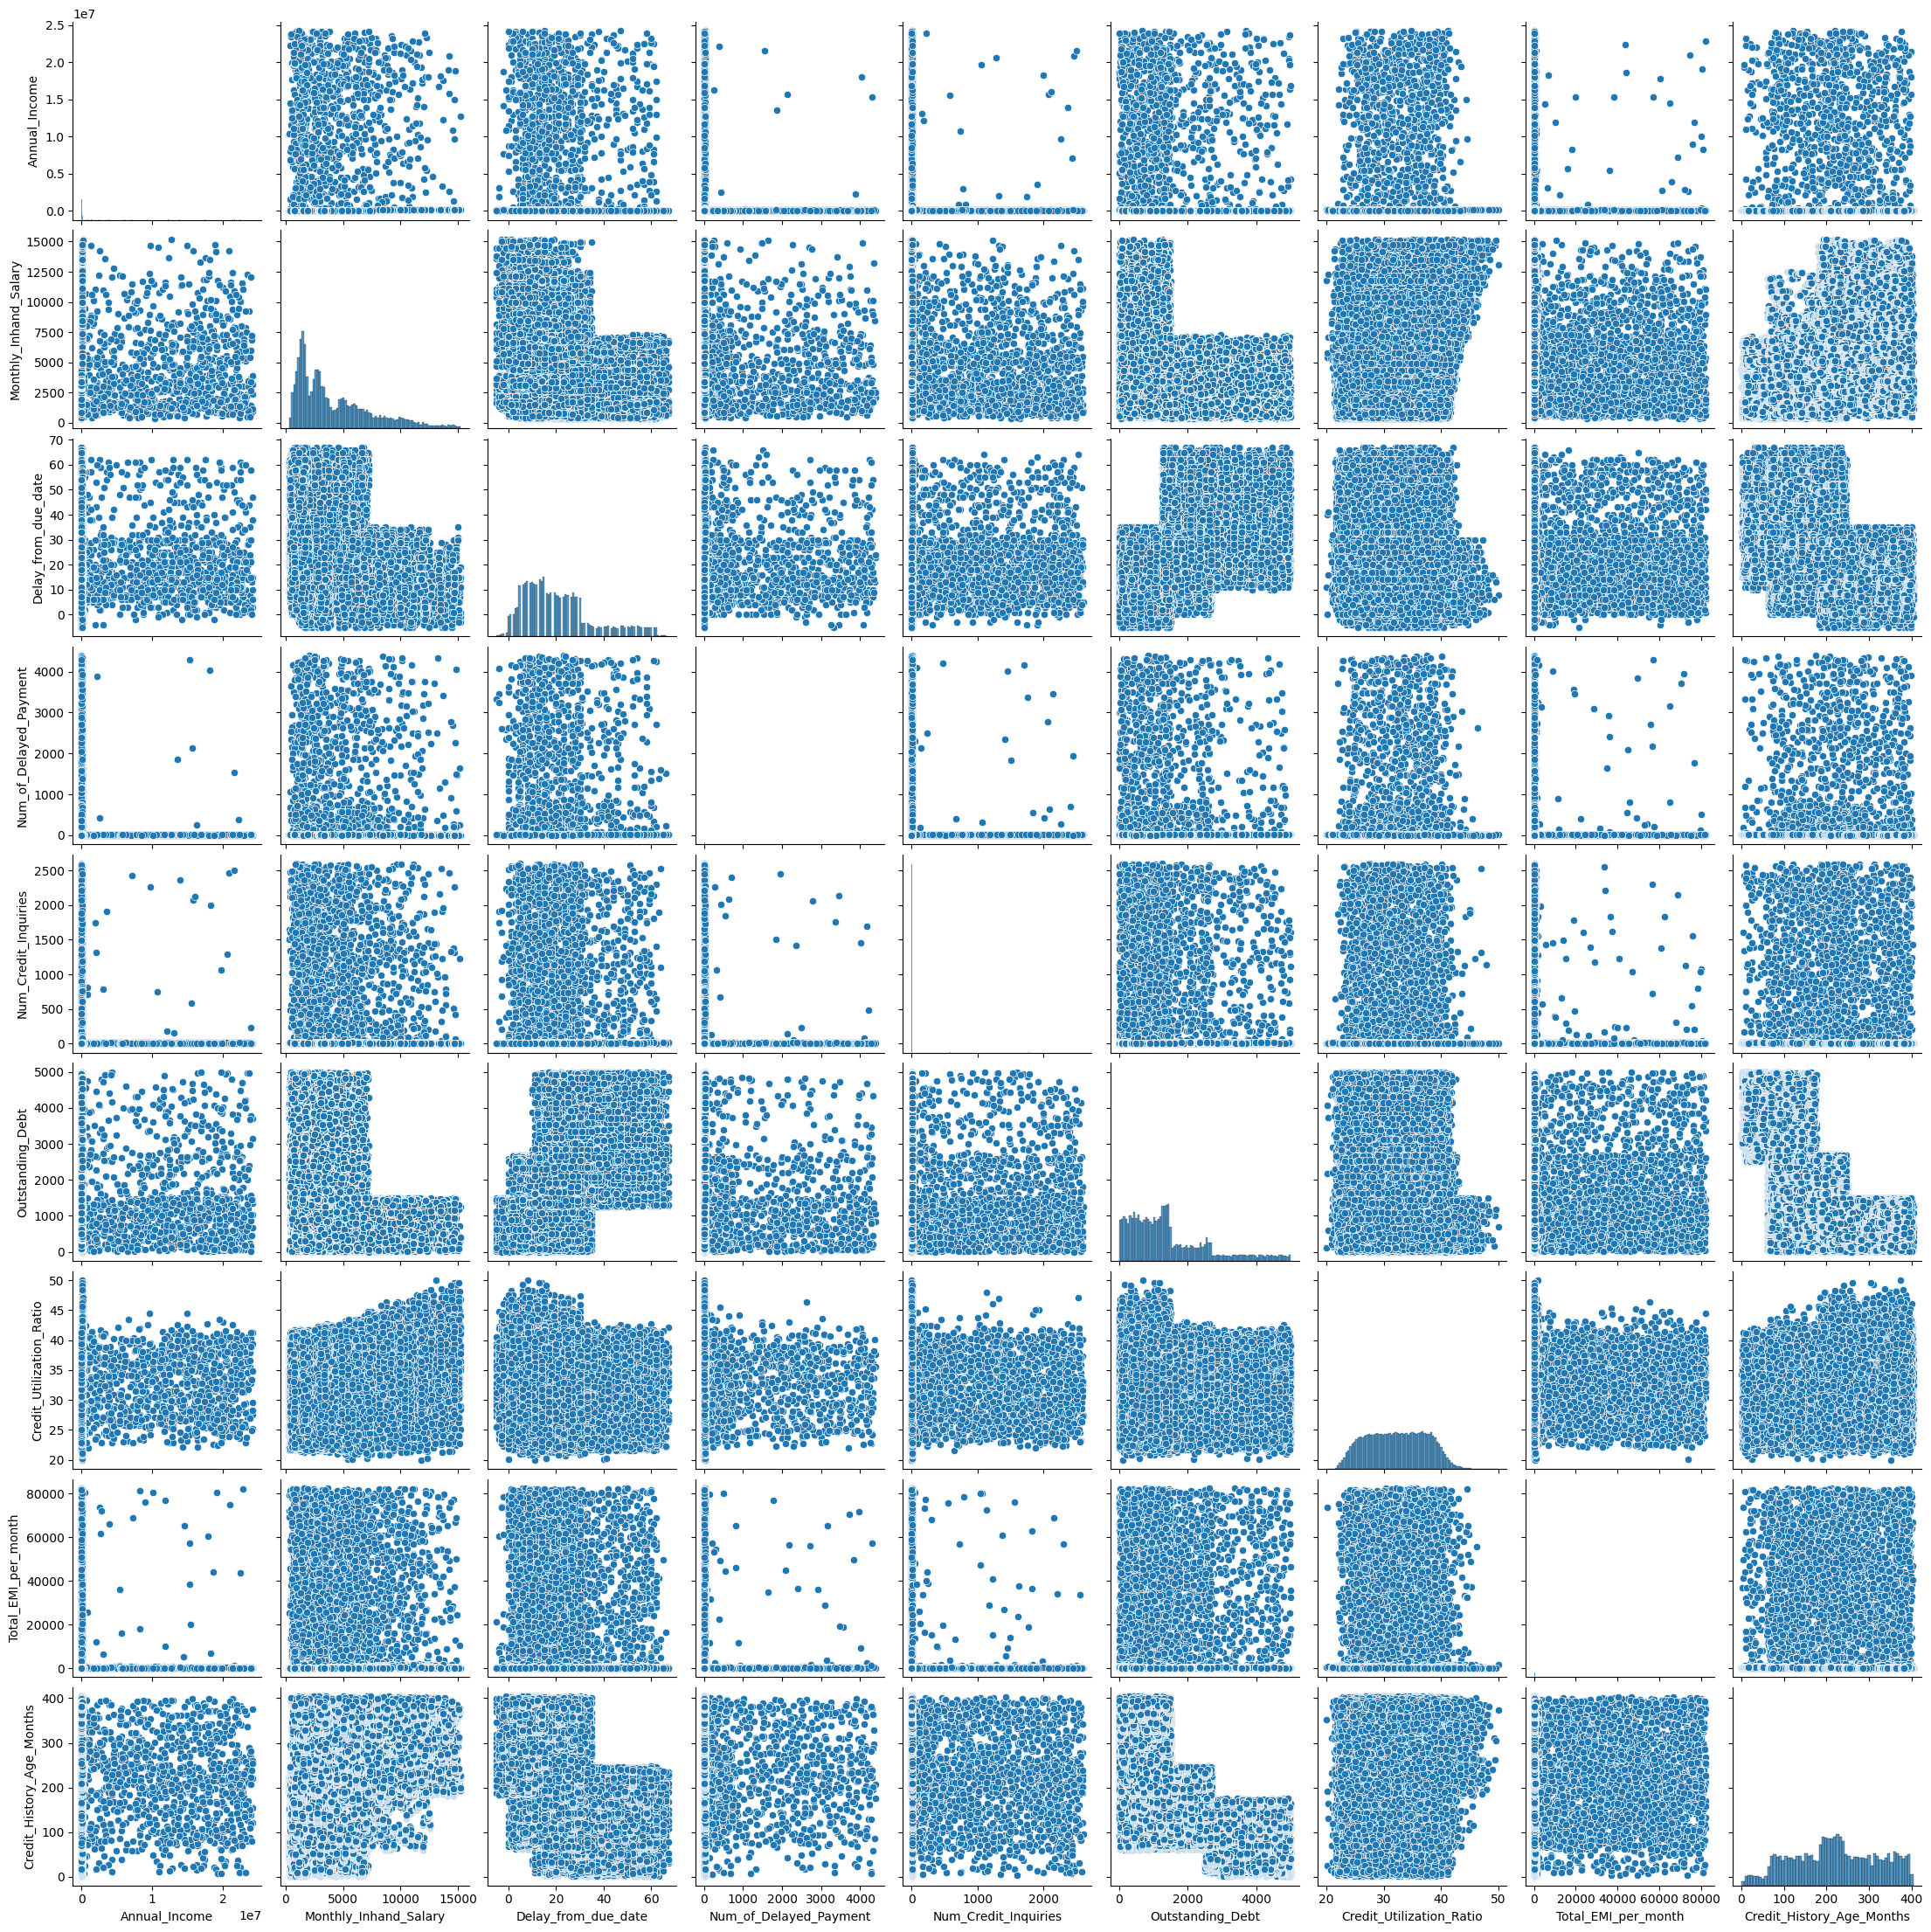

In [328]:
# Using pairplot to find correlation between numerical data
sns.pairplot(data = df1)
plt.show()

<ipython-input-329-61317dc351d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot= True)


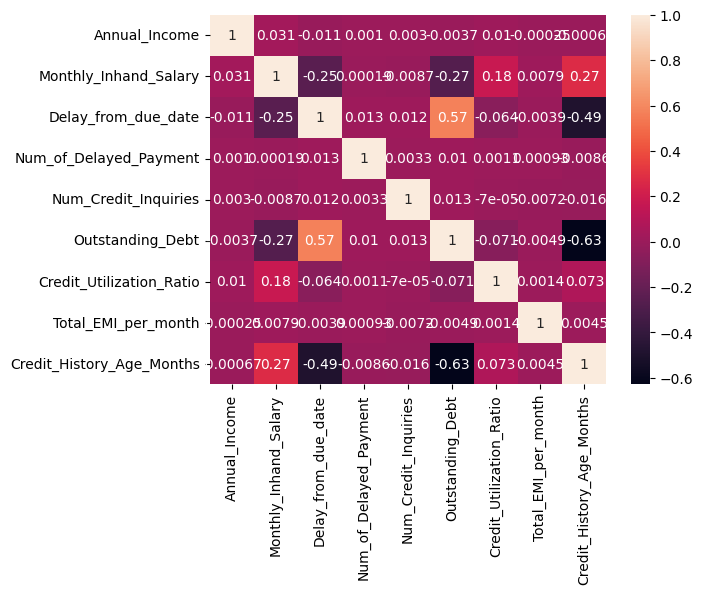

In [329]:
# Using heatmap to identify correlation between numerical data
sns.heatmap(df1.corr(), annot= True)
plt.show()

**Observations:**

* Monthly Inhand Salary is low - Outstanding Debt is high
* As Monthly Inhand Salary increase, credit utilisation ratio increases
* As credit history age increases, delay from due date reduces

# ***Label Encoding of Features***

In [330]:
#List of unique values for categorical features
print("Unique values for Payment_of_Min_Amount : ",df1['Payment_of_Min_Amount'].unique())
print("Unique values for Credit_Mix : ",df1['Credit_Mix'].unique())
print("Unique values for Payment_Behaviour : \n",df1['Payment_Behaviour'].unique())

Unique values for Payment_of_Min_Amount :  ['No' 'NM' 'Yes']
Unique values for Credit_Mix :  ['Standard' 'Good' 'Bad']
Unique values for Payment_Behaviour : 
 ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments']


In [331]:
# Encoding Payment_of_Min_Amount - Yes is good, No is bad, NM (not mentioned) - will be considered as  - Higher is better
df1["Payment_of_Min_Amount"] = df1["Payment_of_Min_Amount"].replace({"Yes": 1,
                                                                     "No" : 0,
                                                                     "NM" : 0})

df1["Payment_of_Min_Amount"].dtype

dtype('int64')

In [332]:
# Encoding Credit_Mix - Good, Standard, Bad in decreasing order of preferance - Higher is better
df1["Credit_Mix"] = df1["Credit_Mix"].replace({"Good" : 2,
                                               "Standard" : 1,
                                               "Bad" : 0})

df1["Credit_Mix"].dtype

dtype('int64')

In [333]:
# Encoding Payment_Behaviour : Higher better
df1["Payment_Behaviour"] = df1["Payment_Behaviour"].replace({
      "Low_spent_Small_value_payments" : 1,
      "High_spent_Small_value_payments" : 2,
      "Low_spent_Medium_value_payments" : 3,
      "High_spent_Medium_value_payments" : 4,
      "Low_spent_Large_value_payments" : 5,
      "High_spent_Large_value_payments" : 6
  })

df1["Payment_Behaviour"].dtype

dtype('int64')

In [334]:
df1.head()

ID Customer_ID     Month           Name  Annual_Income  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh       19114.12   
1  0x1603   CUS_0xd40  February  Aaron Maashoh       19114.12   
2  0x1604   CUS_0xd40     March  Aaron Maashoh       19114.12   
3  0x1605   CUS_0xd40     April  Aaron Maashoh       19114.12   
4  0x1606   CUS_0xd40       May  Aaron Maashoh       19114.12   

   Monthly_Inhand_Salary  Delay_from_due_date  Num_of_Delayed_Payment  \
0            1824.843333                    3                     7.0   
1            1824.843333                   -1                     6.0   
2            1824.843333                    3                     7.0   
3            1824.843333                    5                     4.0   
4            1824.843333                    6                     6.0   

  Changed_Credit_Limit  Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
0                11.27                   4.0           1            809.98   
1                11.27                   4.0           2            809.98   
2                                        4.0           2            809.98   
3                 6.27                   4.0           2            809.98   
4                11.27                   4.0           2            809.98   

   Credit_Utilization_Ratio     Credit_History_Age  Payment_of_Min_Amount  \
0                 26.822620  22 Years and 1 Months                      0   
1                 31.944960  22 Years and 1 Months                      0   
2                 28.609352  22 Years and 3 Months                      0   
3                 31.377862  22 Years and 4 Months                      0   
4                 24.797347  22 Years and 5 Months                      0   

   Total_EMI_per_month  Payment_Behaviour  Credit_History_Age_Months  
0            49.574949                  2                        265  
1            49.574949                  5                        265  
2            49.574949                  3                        267  
3            49.574949                  1                        268  
4            49.574949                  4                        269

# ***Feature Engineering***

In [335]:
# Monthly Debt to Income Ratio (MDTIR) calculation - Lower better

df1['Monthly_Debt_Income_Ratio'] = df1['Outstanding_Debt'] / df1['Monthly_Inhand_Salary']

In [336]:
# Combines payment related features to create a single score - There is penalty for delay in payments - Higher better
df1["Payment_History_Score"] = (-1 * df1["Delay_from_due_date"]    # More the delay more penalty, if paid sooner then score increases
                               -1 * df1["Num_of_Delayed_Payment"] # Higher number of delayed payments, higher penalty
                               +2 * df1["Payment_of_Min_Amount"]  # If minimum amount paid then score increases, if not paid then score doesn't increase (Multipying by 2 give equal weightage to positive and negative factors)
                               )

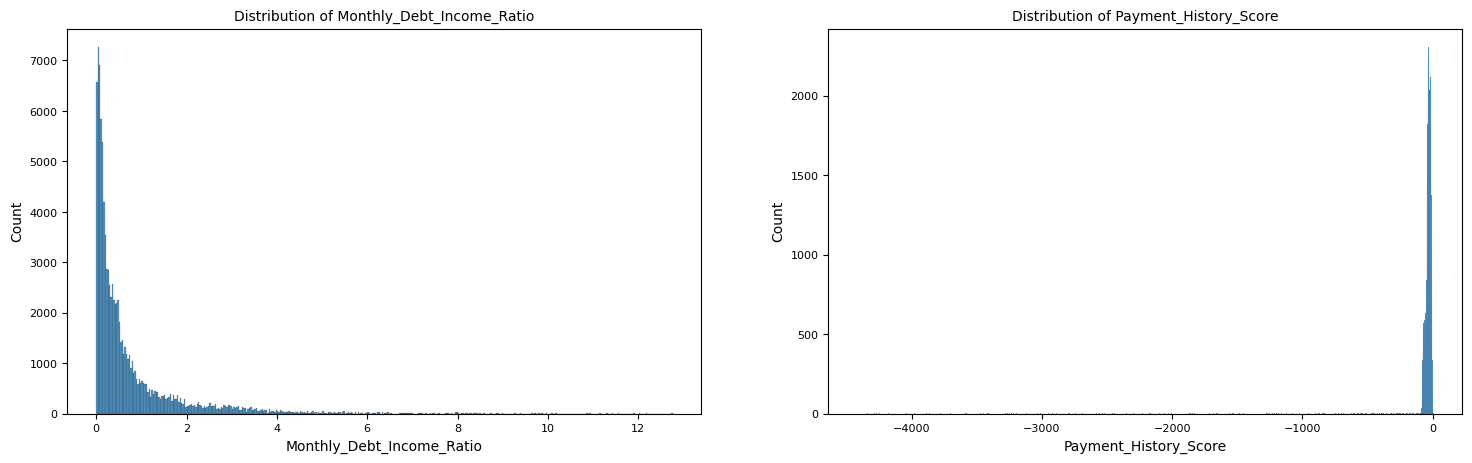

In [337]:
#Plotting engineered features

plt.figure(figsize = (18,5))

plt.subplot(1,2,1)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Distribution of Monthly_Debt_Income_Ratio",fontsize = 10)
sns.histplot(data = df1, x = 'Monthly_Debt_Income_Ratio')

plt.subplot(1,2,2)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Distribution of Payment_History_Score",fontsize = 10)
sns.histplot(data = df1, x = 'Payment_History_Score')

plt.show()

In [338]:
df1.head()

ID Customer_ID     Month           Name  Annual_Income  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh       19114.12   
1  0x1603   CUS_0xd40  February  Aaron Maashoh       19114.12   
2  0x1604   CUS_0xd40     March  Aaron Maashoh       19114.12   
3  0x1605   CUS_0xd40     April  Aaron Maashoh       19114.12   
4  0x1606   CUS_0xd40       May  Aaron Maashoh       19114.12   

   Monthly_Inhand_Salary  Delay_from_due_date  Num_of_Delayed_Payment  \
0            1824.843333                    3                     7.0   
1            1824.843333                   -1                     6.0   
2            1824.843333                    3                     7.0   
3            1824.843333                    5                     4.0   
4            1824.843333                    6                     6.0   

  Changed_Credit_Limit  Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
0                11.27                   4.0           1            809.98   
1                11.27                   4.0           2            809.98   
2                                        4.0           2            809.98   
3                 6.27                   4.0           2            809.98   
4                11.27                   4.0           2            809.98   

   Credit_Utilization_Ratio     Credit_History_Age  Payment_of_Min_Amount  \
0                 26.822620  22 Years and 1 Months                      0   
1                 31.944960  22 Years and 1 Months                      0   
2                 28.609352  22 Years and 3 Months                      0   
3                 31.377862  22 Years and 4 Months                      0   
4                 24.797347  22 Years and 5 Months                      0   

   Total_EMI_per_month  Payment_Behaviour  Credit_History_Age_Months  \
0            49.574949                  2                        265   
1            49.574949                  5                        265   
2            49.574949                  3                        267   
3            49.574949                  1                        268   
4            49.574949                  4                        269   

   Monthly_Debt_Income_Ratio  Payment_History_Score  
0                   0.443863                  -10.0  
1                   0.443863                   -5.0  
2                   0.443863                  -10.0  
3                   0.443863                   -9.0  
4                   0.443863                  -12.0

# ***Credit Score Calculation***

**Features selected for Credit Score Calculation:**

1. Payment_History_Score
>* Weight: 30%
>* Higher the better
>* Predicts future credit behaviour

2. Monthy_Debt_Income_Ratio (MDTIR)
>* Weight: 20%
>* Lower the better
>* Lower ratio suggests better ability to manage debt

3. Credit_Utilization_Ratio
>* Weight: 10%
>* Lower the better
>* Lower ratio suggests responsible credit card usage

4. Num_Credit_Inquiries
>* Weight: 10%
>* Lower the better
>* Fewer inquiries suggest lower credit-seeking behavior

5. Outstanding_Debt
>* Weight: 9%
>* Lower the better
>* Higher debt increases risk of default

6. Credit_History_Age_Months
>* Weight: 9%
>* Higher the better
>* Longer credit history indicates responsible credit usage

7. Credit_Mix
>* Weight: 7%
>* Higher the better
>* Demonstrates the ability to handle multiple types of loans

8. Payment_Behaviour
>* Weight: 5%
>* Higher the better
>* Insights into spending patterns and payment tendencies


In [339]:
def credit_score_calculator(data):

  # Group by Customer ID to handle month-level data and calculate scores
  grouped_data = data.groupby("Customer_ID").agg( Payment_History_Score  = ("Payment_History_Score", "mean"),
                                                  Monthly_Debt_Income_Ratio = ("Monthly_Debt_Income_Ratio", "mean"),
                                                  Credit_Utilization_Ratio = ("Credit_Utilization_Ratio", "mean"),
                                                  Num_Credit_Inquiries = ("Num_Credit_Inquiries", "sum"),
                                                  Outstanding_Debt = ("Outstanding_Debt", "mean"),
                                                  Credit_History_Age_Months = ("Credit_History_Age_Months", "max"),  # Using maximum credit history age
                                                  Credit_Mix = ("Credit_Mix",'mean'),              # Using average credit mix encoding
                                                  Payment_Behaviour = ("Payment_Behaviour","mean") # Using average payment behaviour encoding
                                                  )

  # Standardize values for numerical features
  '''
  Standardization  using Min Max Scaler

  scaler = MinMaxScaler()
  df_scaled = scaler.fit_transform(grouped_data.to_numpy())
  df_scaled = pd.DataFrame(df_scaled, columns=['Payment_History_Score',
                                                  'Monthly_Debt_Income_Ratio',
                                                  'Credit_Utilization_Ratio',
                                                  'Num_Credit_Inquiries',
                                                  'Outstanding_Debt',
                                                  'Credit_History_Age_Months',
                                                  'Credit_Mix',
                                                  'Payment_Behaviour'
                                                  ])
  '''
  grouped_data = (grouped_data - grouped_data.mean()) / grouped_data.std()

  # Calculate weighted scores
  grouped_data["Credit_Score"] = (   0.30 * grouped_data["Payment_History_Score"]
                                   + 0.20 * (1-grouped_data["Monthly_Debt_Income_Ratio"])  #Inverse because lower the better
                                   + 0.10 * (1-grouped_data["Credit_Utilization_Ratio"])   #Inverse because lower the better
                                   + 0.10 * (1-grouped_data["Num_Credit_Inquiries"])  #Inverse because lower the better
                                   + 0.09 * (1-grouped_data["Outstanding_Debt"])  #Inverse because lower the better
                                   + 0.09 * grouped_data["Credit_History_Age_Months"]
                                   + 0.07 * grouped_data["Credit_Mix"]
                                   + 0.05 * grouped_data["Payment_Behaviour"]
                                   )

  # Normalize scores to a range of 0 to 100 via min max scaling
  grouped_data["Credit_Score"] = minmax_scaling(grouped_data, 'Credit_Score')*100

  return grouped_data.reset_index()


# Calculate scores for all customers
df_credit_scores = credit_score_calculator(df1)
df_credit_scores[["Customer_ID","Credit_Score"]]

Customer_ID  Credit_Score
0      CUS_0x1000     77.807771
1      CUS_0x1009     81.264805
2      CUS_0x100b     81.728192
3      CUS_0x1011     85.664109
4      CUS_0x1013     91.079438
...           ...           ...
12495   CUS_0xff3     86.292249
12496   CUS_0xff4     87.572105
12497   CUS_0xff6     92.812635
12498   CUS_0xffc     81.585806
12499   CUS_0xffd     79.784675

[12500 rows x 2 columns]

In [340]:
# Customer with the Minimum credit score i.e. 0
df_credit_scores[df_credit_scores['Credit_Score'] == df_credit_scores['Credit_Score'].min()]

Customer_ID  Payment_History_Score  Monthly_Debt_Income_Ratio  \
5191  CUS_0x5e84             -12.729141                   2.490406   

      Credit_Utilization_Ratio  Num_Credit_Inquiries  Outstanding_Debt  \
5191                  0.511587             -0.242548          1.086957   

      Credit_History_Age_Months  Credit_Mix  Payment_Behaviour  Credit_Score  
5191                   -1.29053   -1.769316          -0.920434           0.0

In [341]:
# Customer with the Maximum credit score i.e 100
df_credit_scores[df_credit_scores['Credit_Score'] == df_credit_scores['Credit_Score'].max()]

Customer_ID  Payment_History_Score  Monthly_Debt_Income_Ratio  \
9882  CUS_0xa394               0.428357                  -0.533218   

      Credit_Utilization_Ratio  Num_Credit_Inquiries  Outstanding_Debt  \
9882                 -2.781521             -0.380564         -1.020967   

      Credit_History_Age_Months  Credit_Mix  Payment_Behaviour  Credit_Score  
9882                   1.739902     1.37974            0.12569         100.0

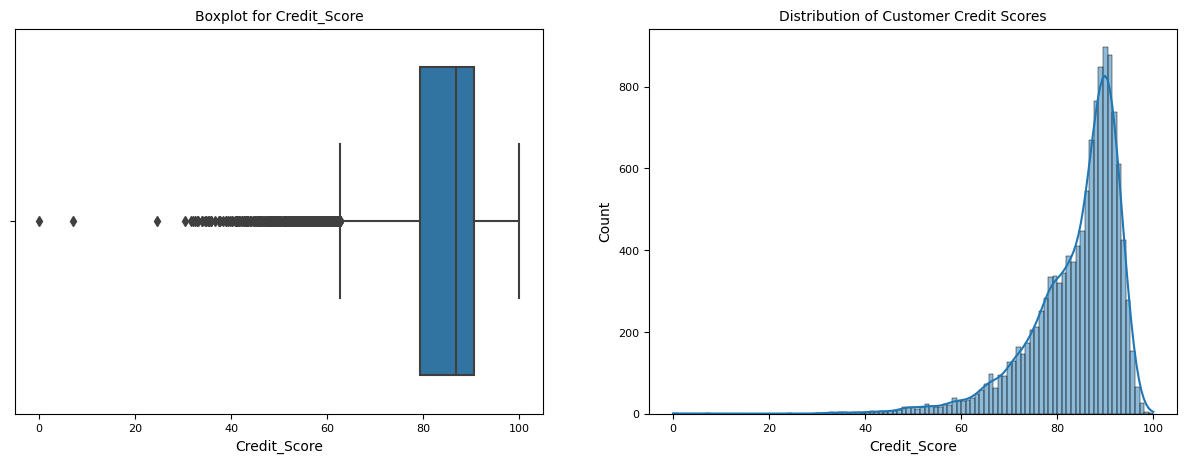

In [342]:
# Distribution of Customer Credit Scores

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Boxplot for Credit_Score",fontsize = 10)
sns.boxplot(data = df_credit_scores, x = 'Credit_Score')

plt.subplot(1,2,2)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.title("Distribution of Customer Credit Scores",fontsize = 10)
sns.histplot(data = df_credit_scores, x = 'Credit_Score', kde = True)

plt.show()

In [343]:
df_credit_scores['Credit_Score'].describe()

count    12500.000000
mean        83.966979
std          9.379372
min          0.000000
25%         79.410745
50%         86.807142
75%         90.541944
max        100.000000
Name: Credit_Score, dtype: float64

In [344]:
print("% customers with Credit Score below 40 : ",(df_credit_scores[df_credit_scores['Credit_Score'] < 40].shape[0] / df_credit_scores.shape[0])*100,"%")
print("% customers with Credit Score below 60 : ",(df_credit_scores[df_credit_scores['Credit_Score'] < 60].shape[0] / df_credit_scores.shape[0])*100,"%")
print("% customers with Credit Score below 85 : ",(df_credit_scores[df_credit_scores['Credit_Score'] < 85].shape[0] / df_credit_scores.shape[0])*100,"%")
print("% customers with Credit Score above 95 : ",(df_credit_scores[df_credit_scores['Credit_Score'] > 95].shape[0] / df_credit_scores.shape[0])*100,"%")

% customers with Credit Score below 40 :  0.208 %
% customers with Credit Score below 60 :  2.688 %
% customers with Credit Score below 85 :  41.959999999999994 %
% customers with Credit Score above 95 :  2.52 %


# ***Insights***

1. This dataset includes credit data for 12500 customers over a span of 8 months from January to August of a particular year. (year is not specified)
2. Credit Utilization ratio lies between 20% and 50%.
3. Customer_ID has 12500 unique values and SSN has 12501 unique values.
One customer must have been assigned an incorrect SSN value - Since this column is not required for Credit Scoring hence further analysis is not done on it.
-----------------------------------------------
4. When Monthly Inhand Salary is low, Outstanding Debt is high > **Loan probably taken during early stages of career (25-35 years of age) when Human Capital (HC) is high and Financial Capital (FC) is low.**
5. As Monthly Inhand Salary increase, credit utilisation ratio increases > **As your HC decreased and FC increases with age, credit utilization is also seen to increase.**
6. As credit history age increases, delay from due date reduces. > **Credit history age would increase as you age, FC is expected to increase which increases your ability to service your debt payments thus delay from due date is expected to decrease.
This could also mean that there is delay in payment of dues probably because the Monthly Inhand Salary or Savings is low enough to be able to pay back the debt.**
7. Credit Utilization ratio and Credit History Age in Months show a near normal (not skewed distribution)
8. Outstanding Debt, Monthly Inhand Salary, Delay from Due date show a right skewed distribution which can be treated using log normal transformation.

-------------------------------------------------------
***Features used for Credit Score Calculation with weightages:***

Payment_History_Score - 30%

Monthy_Debt_Income_Ratio (MDTIR) - 20%

Credit_Utilization_Ratio - 10%

Num_Credit_Inquiries - 10%

Outstanding_Debt - 9%

Credit_History_Age_Months - 9%

Credit_Mix - 7%

Payment_Behaviour - 5%

***Distribution of Credit Scores for customers is left skewed meaning there are a considerable chunk of customers with a bad credit score however there is significant ot majority customers with credit scores around 87-90.***


# ***Recommendation***

1. Additional features can be utilized and weightings can be updated to improve the credit scoring model.
2. Machine Learning models can be used to make the credit scoring model more robust.
3. Further analysis on the Credit scores along with the age of the customer and other factors can be done to perform customer segmentation.
Customer Segmentation data will help identify the target audience and increase the business and profits accordingly.